
UNIVERSIDADE METROPOLITANA DA GRANDE FORTALEZA <br>
SISTEMA DE INFORMAÇÃO
<br>

**INTELIGÊNCIA ARTIFICIAL <br>
AVALIAÇÃO PRÁTICA SUPERVISIONADA**

JÉSSICA RODRIGUES DA COSTA 1-2018111637 <br>
JÚLIO CÉSAR CARNEIRO DE OLIVEIRA 1-2018111279 <br>
WILLAME CARNEIRO HENRIQUE 1-2018110720

<center>

---


Este trabalho tem como objetivo fazer uma análise apartir do dataset de **Vinhos**.</center> <br>

Link do **dataset**: [Vinho](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data) <br>

Obs: A análise pode ser feita pelo *sklearn (load_wine)* [*from sklearn.datasets import load_wine*] entretanto foi optado usar o mesmo dataset por meio externo.

## **Análise de Vinho**

* Será utilizado o modelo de **Regressão** do KNN, utilizando a métrica <br> 
euclidiana com um intervalo de 1 a 11 vizinhos; <br>

* Será utilizado ***MinMaxScaler*** para fazer a normalização;

* Será colocado em *treino* e em *teste*.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data' 
data_columns = ['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline']
data = pd.read_csv(wine_url,skipinitialspace=True,names= data_columns)
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840




---


Preparando os dados

---



In [ ]:
X = data[ ['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline']]
y = data['color_intensity']



---

Aplicando o Treino e o Teste

---



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)



---

Aplicando a Normalização

---



In [ ]:
mm = MinMaxScaler()
X_train_sc = mm.fit_transform(X_train)
X_test_sc = mm.transform(X_test)

In [ ]:
train = []
test = []
train_sc = []
test_sc = []
for n in range(1,11):
    knn = KNeighborsRegressor(n_neighbors=n,metric='euclidean')
    knn.fit(X_train,y_train)
    train.append(knn.score(X_train,y_train))
    test.append(knn.score(X_test,y_test))
    
    knn = KNeighborsRegressor(n_neighbors=n,metric='euclidean')
    knn.fit(X_train_sc,y_train)
    train_sc.append(knn.score(X_train_sc,y_train))
    test_sc.append(knn.score(X_test_sc,y_test))

In [ ]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

##**Gráficos**

In [ ]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


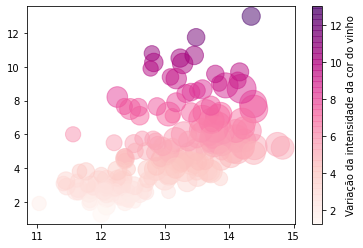

In [ ]:
c = data.color_intensity
plt.scatter(data.alcohol,data.color_intensity, c=c, cmap= 'RdPu', s= data.proline*.5, alpha=0.5)
cbar = plt.colorbar()
cbar.set_label('Variação da intensidade da cor do vinho')

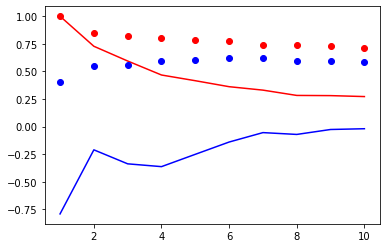

In [ ]:
plt.plot(range(1,11),train,'r-')
plt.plot(range(1,11),test,'b-')
plt.plot(range(1,11),train_sc,'ro')
plt.plot(range(1,11),test_sc,'bo')
plt.show()